In [252]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.feature_selection import mutual_info_regression
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge



In [253]:
df = pd.read_csv('LifeExpectancyClean.csv', index_col=0)
df = df[df['Status'] == 1]

In [254]:
cols = ['Alcohol', 'Percentage Expenditure',
       'Diphtheria', 'HIV/AIDS', 'Population', 'PopulationDensity',
       'Income Composition of Resources', 'HighIncome', 
       'HealthyWeightBMI', 'Thinness 1-19 Years',
       'Human Rights', 'Suicide Rate', 'Agriculture Employment', 'Schooling']

cols_ext = ['Life Expectancy',
       'Alcohol', 'Percentage Expenditure',
       'Diphtheria', 'HIV/AIDS', 'Population', 'PopulationDensity',
       'Income Composition of Resources', 'HighIncome', 
       'HealthyWeightBMI', 'Thinness 1-19 Years',
       'Human Rights', 'Suicide Rate', 'Agriculture Employment', 'Schooling']

## Multiple Linear Regression Model

In [255]:
# Prepare the data
X = df[cols]  # Independent variables
y = df['Life Expectancy']  # Dependent variable

# Add constant to the independent variables (intercept term)
X = sm.add_constant(X, has_constant='add')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)
ridge_model.fit(X_train, y_train)

# Predictions
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {np.sqrt(mse)}')
print(f'R^2: {r2}')

# Coefficients and intercept
print("Intercept:", ridge_model.intercept_)
print("Coefficients:", ridge_model.coef_)

# Approximate p-values using statsmodels OLS
ols_model = sm.OLS(y_train, X_train).fit()
print(ols_model.summary())  # Will show coefficients, p-values, and more


MAE: 1.7662875588669313
MSE: 6.3477274209819
RMSE: 2.519469670581867
R^2: 0.5565317461311085
Intercept: 67.34879102774771
Coefficients: [ 0.00000000e+00 -1.47024694e-01  1.26968325e-04  2.50784517e-02
 -4.56613542e-29  1.67912778e-09  1.35935008e-05  6.82242331e+00
  2.77432438e-02  3.59335620e+00 -1.79060610e+00  2.43580558e+00
 -1.01784474e-01  2.02978819e-05  3.26683936e-01]
                            OLS Regression Results                            
Dep. Variable:        Life Expectancy   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     48.05
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           5.09e-73
Time:                        22:16:52   Log-Likelihood:                -949.26
No. Observations:                 409   AIC:                             1927.
Df Residuals:                     395   BIC:                      

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.04086e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


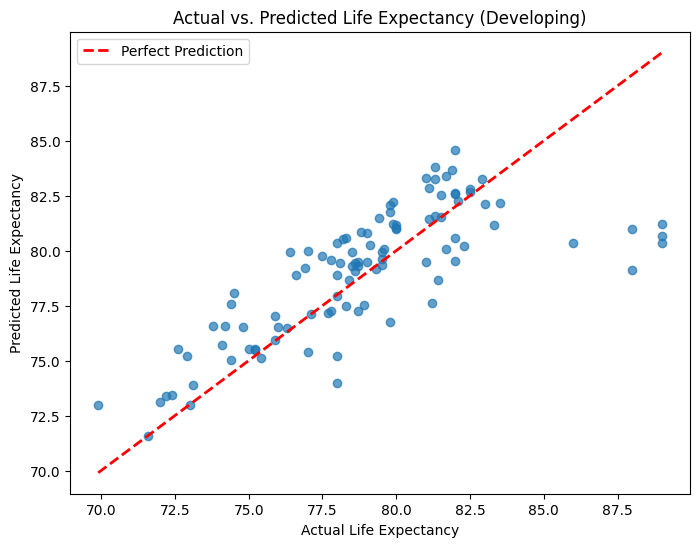

In [256]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')  # Diagonal line
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs. Predicted Life Expectancy (Developing)')
plt.legend()
plt.show()


## Test Multicollinearity and Correlation

### VIF

In [257]:
# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


/opt/homebrew/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                           Variable           VIF
0                             const  0.000000e+00
1                           Alcohol  1.713754e+00
2            Percentage Expenditure  2.213388e+00
3                        Diphtheria  1.070196e+00
4                          HIV/AIDS  2.837877e-13
5                        Population  1.941489e+00
6                 PopulationDensity  5.529881e+00
7   Income Composition of Resources  4.258675e+00
8                        HighIncome  1.921995e+00
9                  HealthyWeightBMI  2.273139e+00
10              Thinness 1-19 Years  3.161841e+00
11                     Human Rights  6.130599e+00
12                     Suicide Rate  2.065729e+00
13           Agriculture Employment  1.951245e+00
14                        Schooling  3.136878e+00


### PCA

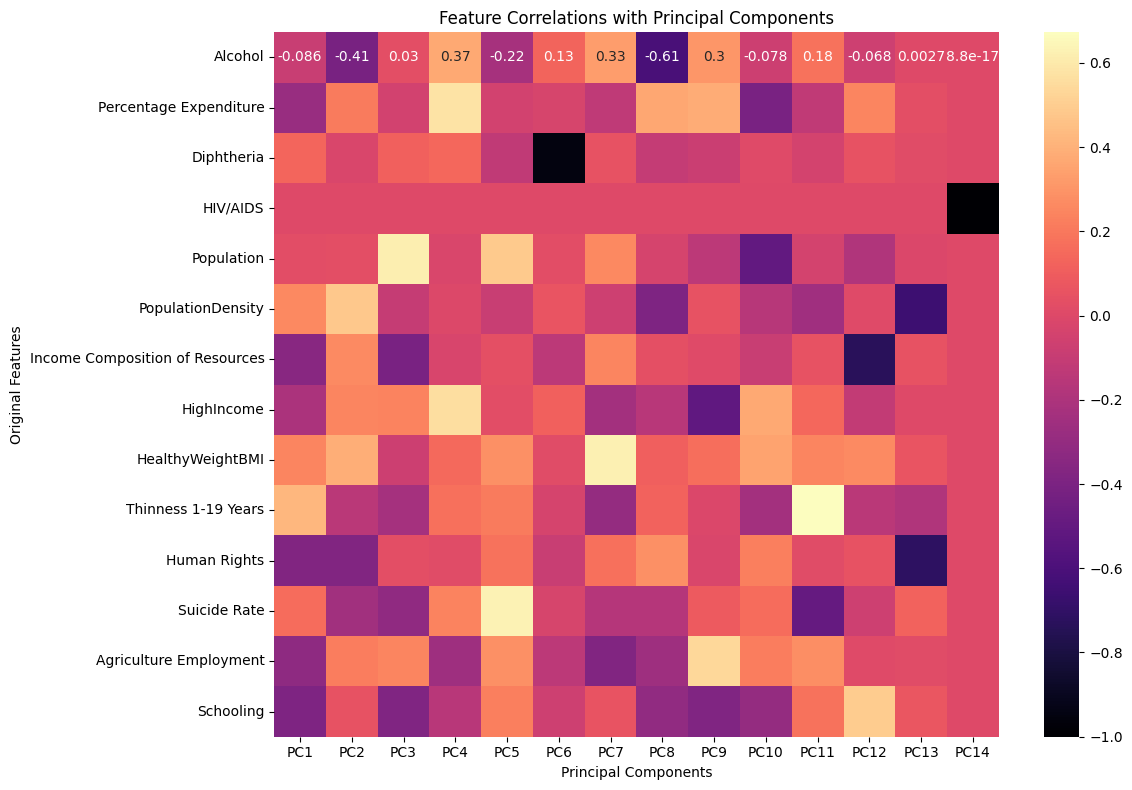

PC1 explains 25.21% of the variance.
PC2 explains 20.51% of the variance.
PC3 explains 12.74% of the variance.
PC4 explains 10.08% of the variance.
PC5 explains 8.09% of the variance.
PC6 explains 7.34% of the variance.
PC7 explains 4.32% of the variance.
PC8 explains 3.45% of the variance.
PC9 explains 2.90% of the variance.
PC10 explains 1.86% of the variance.
PC11 explains 1.70% of the variance.
PC12 explains 1.08% of the variance.
PC13 explains 0.71% of the variance.
PC14 explains 0.00% of the variance.


In [258]:
X_PCA = df[cols]

# Standardize the data (important for PCA to ensure all features have equal weight)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_PCA)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get the loadings (correlation of features with PCs)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(X_pca.shape[1])],
    index=cols
)

# Calculate the explained variance ratio for each PC
explained_variance = pca.explained_variance_ratio_

# Plot the correlation matrix (heatmap) of features with principal components
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap="magma", cbar=True)
plt.title("Feature Correlations with Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Original Features")
plt.tight_layout()
plt.show()

# Print explained variance ratios
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i} explains {var:.2%} of the variance.")

### Correlation Matrix

,Life Expectancy,Alcohol,Percentage Expenditure,Diphtheria,HIV/AIDS,Population,PopulationDensity,Income Composition of Resources,HighIncome,HealthyWeightBMI,Thinness 1-19 Years,Human Rights,Suicide Rate,Agriculture Employment,Schooling
Life Expectancy,1.000000,-0.281072,0.362721,-0.019605,NaN,0.064063,0.136584,0.602644,0.284671,0.185111,-0.588078,0.096816,-0.415739,0.480804,0.370086
Alcohol,-0.281072,1.000000,0.052735,-0.006807,NaN,-0.077151,-0.488036,-0.203197,0.014914,-0.384339,0.004574,0.424567,0.172722,-0.274889,-0.038646
Percentage Expenditure,0.362721,0.052735,1.000000,-0.040375,NaN,-0.094988,0.008816,0.464350,0.603308,0.055436,-0.300822,0.149383,-0.118746,0.227081,0.227707
Diphtheria,-0.019605,-0.006807,-0.040375,1.000000,NaN,0.043212,0.041823,-0.124226,-0.049267,0.058098,0.167824,-0.087540,0.019750,-0.078964,-0.211123
HIV/AIDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population,0.064063,-0.077151,-0.094988,0.043212,NaN,1.000000,-0.077882,-0.344638,0.202635,0.139575,-0.136512,0.055190,-0.059533,0.282149,-0.242254
PopulationDensity,0.136584,-0.488036,0.008816,0.041823,NaN,-0.077882,1.000000,0.081463,0.108102,0.618330,0.156839,-0.854191,-0.128980,-0.023916,-0.183243
Income Composition of Resources,0.602644,-0.203197,0.464350,-0.124226,NaN,-0.344638,0.081463,1.000000,0.184056,0.100549,-0.440457,0.180711,-0.148902,0.339693,0.721655
HighIncome,0.284671,0.014914,0.603308,-0.049267,NaN,0.202635,0.108102,0.184056,1.000000,0.088340,-0.311196,0.005075,-0.184112,0.250981,0.088076
HealthyWeightBMI,0.185111,-0.384339,0.055436,0.058098,NaN,0.139575,0.618330,0.100549,0.088340,1.000000,0.216376,-0.546032,0.075093,-0.107775,-0.196143


/opt/homebrew/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


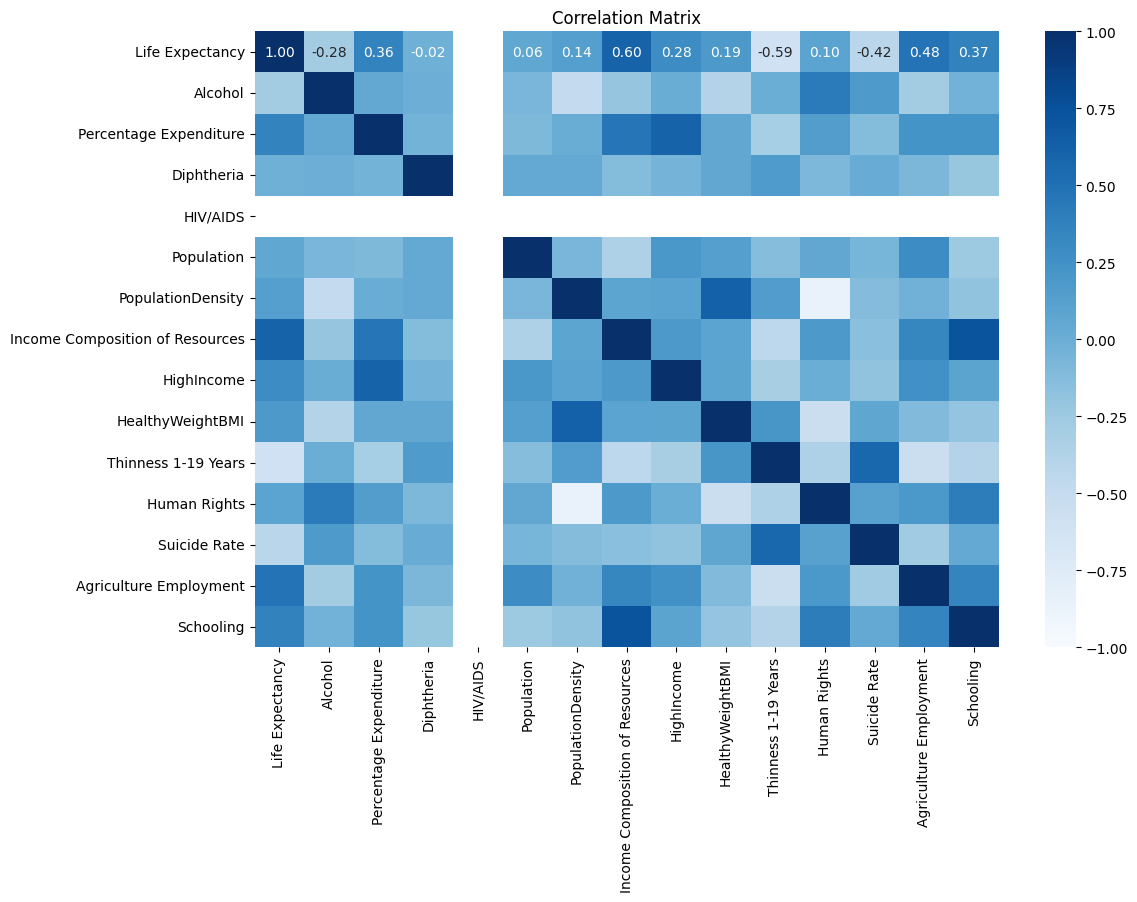

In [259]:
df_corr = df[cols_ext]

# Compute the correlation matrix
corr_matrix = df_corr.corr()

# Display the correlation matrix
display(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


## Feature Importance - Random Forest


Feature Importance:
                            Feature  Importance
7   Income Composition of Resources    0.483812
10              Thinness 1-19 Years    0.113018
13           Agriculture Employment    0.091801
1                           Alcohol    0.064617
6                 PopulationDensity    0.060142
12                     Suicide Rate    0.041943
2            Percentage Expenditure    0.033297
14                        Schooling    0.031412
11                     Human Rights    0.029917
5                        Population    0.026505
3                        Diphtheria    0.021594
8                        HighIncome    0.001138
9                  HealthyWeightBMI    0.000805
0                             const    0.000000
4                          HIV/AIDS    0.000000


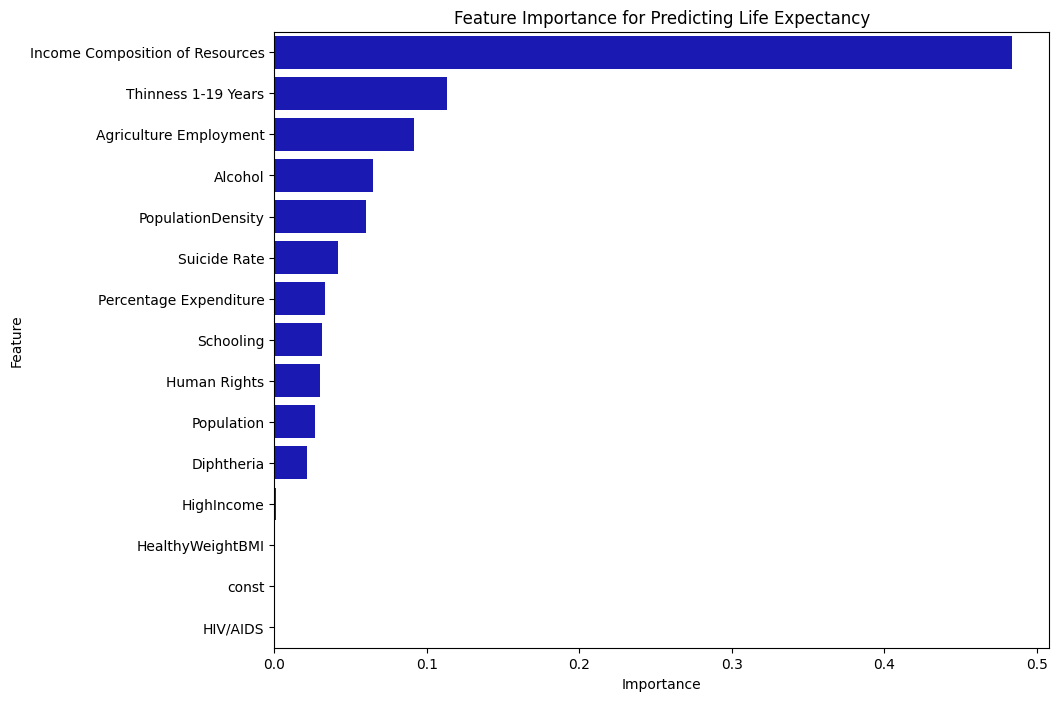

In [260]:
# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', color='mediumblue', data=feature_importance)
plt.title('Feature Importance for Predicting Life Expectancy')
plt.show()
